In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import seaborn as sns

In [37]:
df = pd.read_csv("/content/California_Houses.csv")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [38]:
inputs = ['Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']
output = ['Median_House_Value']

In [39]:
score = []
n = 100
xgb_reg = XGBRegressor(objective ='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=None, colsample_bytree = 0.3, alpha = 10)
for state in range(n):
  dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=state)
  xgb_reg.fit(dfTrain[inputs], dfTrain[output])
  score.append(xgb_reg.score(dfTest[inputs], dfTest[output]))

<Axes: ylabel='Density'>

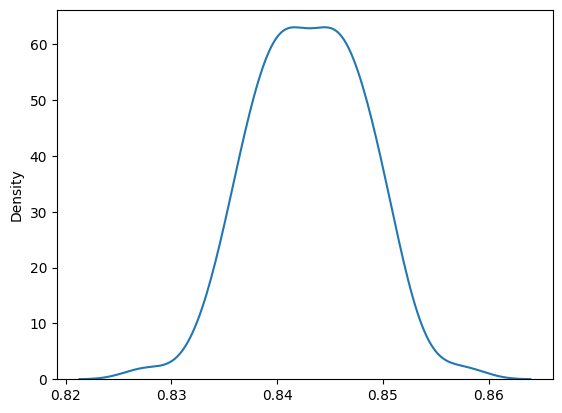

In [40]:
sns.kdeplot(score)

In [43]:
avg_score = sum(score)/len(score)
avg_score

0.8430300403873011

In [44]:
for state in range(n):
  dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=state)
  xgb_reg.fit(dfTrain[inputs], dfTrain[output])
  if abs(xgb_reg.score(dfTest[inputs], dfTest[output])-avg_score) < 1e-4:
    break

<Axes: ylabel='Median_House_Value'>

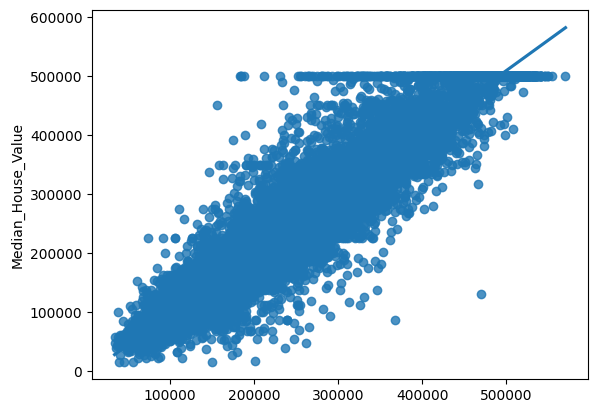

In [42]:
sns.regplot(x=xgb_reg.predict(df[inputs]), y=df[output])